### Importing Libraries

In [562]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Defining functions

In [563]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
def polynomial_regression_train(k, X_train, y_train, X_test):
    poly_reg = PolynomialFeatures(degree=k)
    X_poly = poly_reg.fit_transform(X_train)
    regressor = LinearRegression()
    regressor.fit(X_poly, y_train)
    return regressor.predict(poly_reg.fit_transform(X_test))

### Importing Data

In [564]:
dataset = pd.read_csv("rank_salary.csv")
dataset

,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000
5,Professor,6,150000
6,Associate Dean,7,200000
7,Dean,8,300000
8,Vice Chancellor,9,500000
9,Chancellor,10,1000000


In [565]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [566]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [567]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Visualisation of data

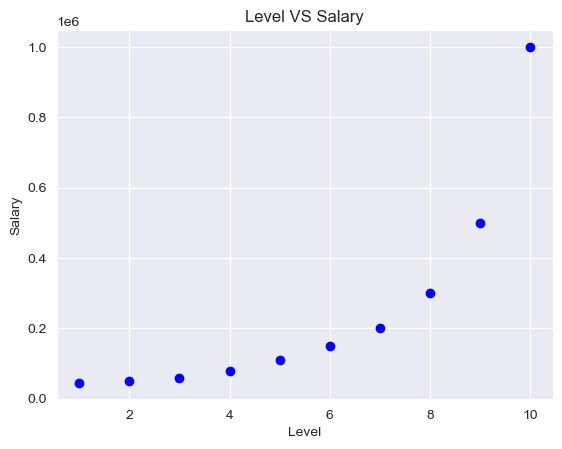

In [568]:
plt.scatter(X, y, color='blue')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Level VS Salary')
plt.show()

### Test Train Splitting

In [569]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [570]:
print(X_train)

[[ 5]
 [ 3]
 [ 9]
 [10]
 [ 7]
 [ 2]
 [ 6]
 [ 1]]


In [571]:
print(X_test)

[[4]
 [8]]


In [572]:
print(y_train)

[ 110000   60000  500000 1000000  200000   50000  150000   45000]


In [573]:
print(y_test)

[ 80000 300000]


### Training the model

In [574]:
y_pred_k = []
for i in range(1, 10):
    y_pred_k.append(polynomial_regression_train(i, X_train, y_train, X_test))

In [575]:
print("Predicted Values at:-")
for i in range(1, 10):
    print(f"Degree-{i}:-")
    print(y_pred_k[i-1])

Predicted Values at:-
Degree-1:-
[146988.15566836 488477.15736041]
Degree-2:-
[  7583.56604891 431311.24650927]
Degree-3:-
[ 89149.22103214 338377.55598831]
Degree-4:-
[103187.36604789 279820.39969933]
Degree-5:-
[ 77098.02723492 285664.71717933]
Degree-6:-
[ 79544.96011612 290203.04568538]
Degree-7:-
[ 78854.1666806  288645.83332706]
Degree-8:-
[ 79107.53700267 288054.63588264]
Degree-9:-
[ 79208.22481302 287626.6656399 ]


### Performance Analysis

In [576]:
from sklearn.metrics import r2_score
r2scores = []
for i in range(1,10):
    print(f"The R2 score of model at degree={i} is {r2_score(y_test, y_pred_k[i-1])}")
    r2scores.append(r2_score(y_test, y_pred_k[i-1]))

The R2 score of model at degree=1 is -0.6533492498556841
The R2 score of model at degree=2 is 0.0707940757847294
The R2 score of model at degree=3 is 0.9356799566474857
The R2 score of model at degree=4 is 0.9609557763415897
The R2 score of model at degree=5 is 0.9911602570463691
The R2 score of model at degree=6 is 0.9960253150769168
The R2 score of model at degree=7 is 0.9946185936019549
The R2 score of model at degree=8 is 0.9940707349546347
The R2 score of model at degree=9 is 0.9936476730936541


### Degree Analysis

In [577]:
x_values = []
for i in range(1, 10):
    x_values.append(i)

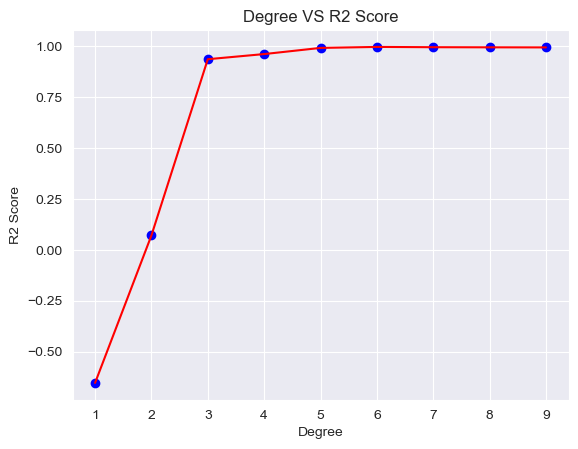

In [578]:
plt.scatter(x_values, r2scores, color='blue')
plt.plot(x_values, r2scores, color='red')
plt.xlabel('Degree')
plt.ylabel('R2 Score')
plt.title('Degree VS R2 Score')
plt.show()

So best degree = 4

### Remodelling based on Degree 3

In [591]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [592]:
y_pred = regressor.predict(poly_reg.fit_transform(X_test))

In [593]:
final_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
final_df

,Actual,Predicted
0,80000,89149.221032
1,300000,338377.555988


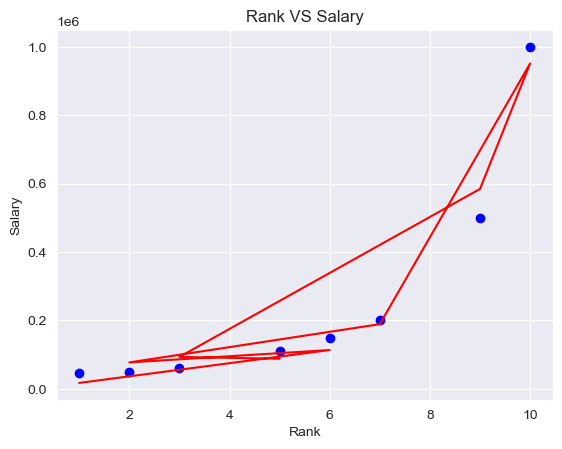

In [594]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(poly_reg.fit_transform(X_train)), color='red')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.title('Rank VS Salary')
plt.show()